In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import os
data1 = pd.read_csv('/content/drive/MyDrive/dataset/mydataset.csv', header=0, low_memory=False)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
data = pd.DataFrame()
for i in data1.columns:
  data[i] = le.fit_transform(data1[i])

In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = data.iloc[:, 1:87]
y = data.iloc[:, 87]

In [25]:
data1

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,49113,172.16.0.5-192.168.50.1-5838-5838-6,172.16.0.5,5838,192.168.50.1,5838,6,2018-12-01 13:29:48.327410,27493436,4,...,0.000000,1.0,1.0,27493434.0,0.000000e+00,27493434.0,27493434.0,0,1,UDP-lag
1099996,215934,172.16.0.5-192.168.50.1-30092-1933-6,172.16.0.5,30092,192.168.50.1,1933,6,2018-12-01 13:29:48.327411,49,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,UDP-lag
1099997,106929,172.16.0.5-192.168.50.1-42092-42092-6,172.16.0.5,42092,192.168.50.1,42092,6,2018-12-01 13:29:48.327460,26907958,6,...,57.982756,83.0,1.0,13453918.5,4.202243e+06,16425353.0,10482484.0,0,1,UDP-lag
1099998,131754,172.16.0.5-192.168.50.1-30093-25747-6,172.16.0.5,30093,192.168.50.1,25747,6,2018-12-01 13:29:48.327519,58,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,UDP-lag


In [6]:
data1[' Label']

0         DrDoS_DNS
1         DrDoS_DNS
2         DrDoS_DNS
3         DrDoS_DNS
4         DrDoS_DNS
            ...    
105434      WebDDoS
105435      WebDDoS
105436      WebDDoS
105437      WebDDoS
105438      WebDDoS
Name:  Label, Length: 105439, dtype: object

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [27]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [28]:
fit.scores_

array([7.92298810e+10, 1.16258397e+07, 1.25344728e+10, 1.06464183e+06,
       3.29915714e+08, 9.49928296e+04, 1.95728082e+11, 2.13226055e+10,
       4.05467897e+07, 3.15722968e+06, 6.59578887e+08, 1.18108727e+08,
       3.90177178e+08, 3.72538575e+08, 8.71378199e+08, 1.41521108e+08,
       5.80395067e+07, 2.12474999e+07, 2.51547209e+08, 1.24472862e+08,
       2.46771446e+10, 3.51304615e+09, 2.63550854e+10, 4.04580661e+10,
       1.72631725e+10, 6.12992323e+06, 2.04391606e+10, 2.42625642e+10,
       3.81493016e+10, 1.65656554e+10, 1.00796703e+06, 6.78983257e+08,
       5.51398343e+08, 5.61010325e+08, 5.66324068e+08, 7.51721542e+05,
       1.24418062e+05,            nan,            nan,            nan,
       9.62676686e+06, 5.76556592e+06, 4.06679156e+09, 1.23114630e+10,
       3.73418517e+08, 3.65004845e+08, 1.11804832e+09, 1.91994239e+08,
       2.04409331e+08,            nan, 9.73651776e+02, 1.24418062e+05,
                  nan, 7.20469254e+05, 3.12637255e+05, 1.68379075e+05,
      

In [29]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [30]:
featureScores

,Specs,Score
0,Flow ID,7.922988e+10
1,Source IP,1.162584e+07
2,Source Port,1.253447e+10
3,Destination IP,1.064642e+06
4,Destination Port,3.299157e+08
...,...,...
81,Idle Std,1.098477e+10
82,Idle Max,1.372589e+10
83,Idle Min,1.098693e+10
84,SimillarHTTP,9.047230e+06


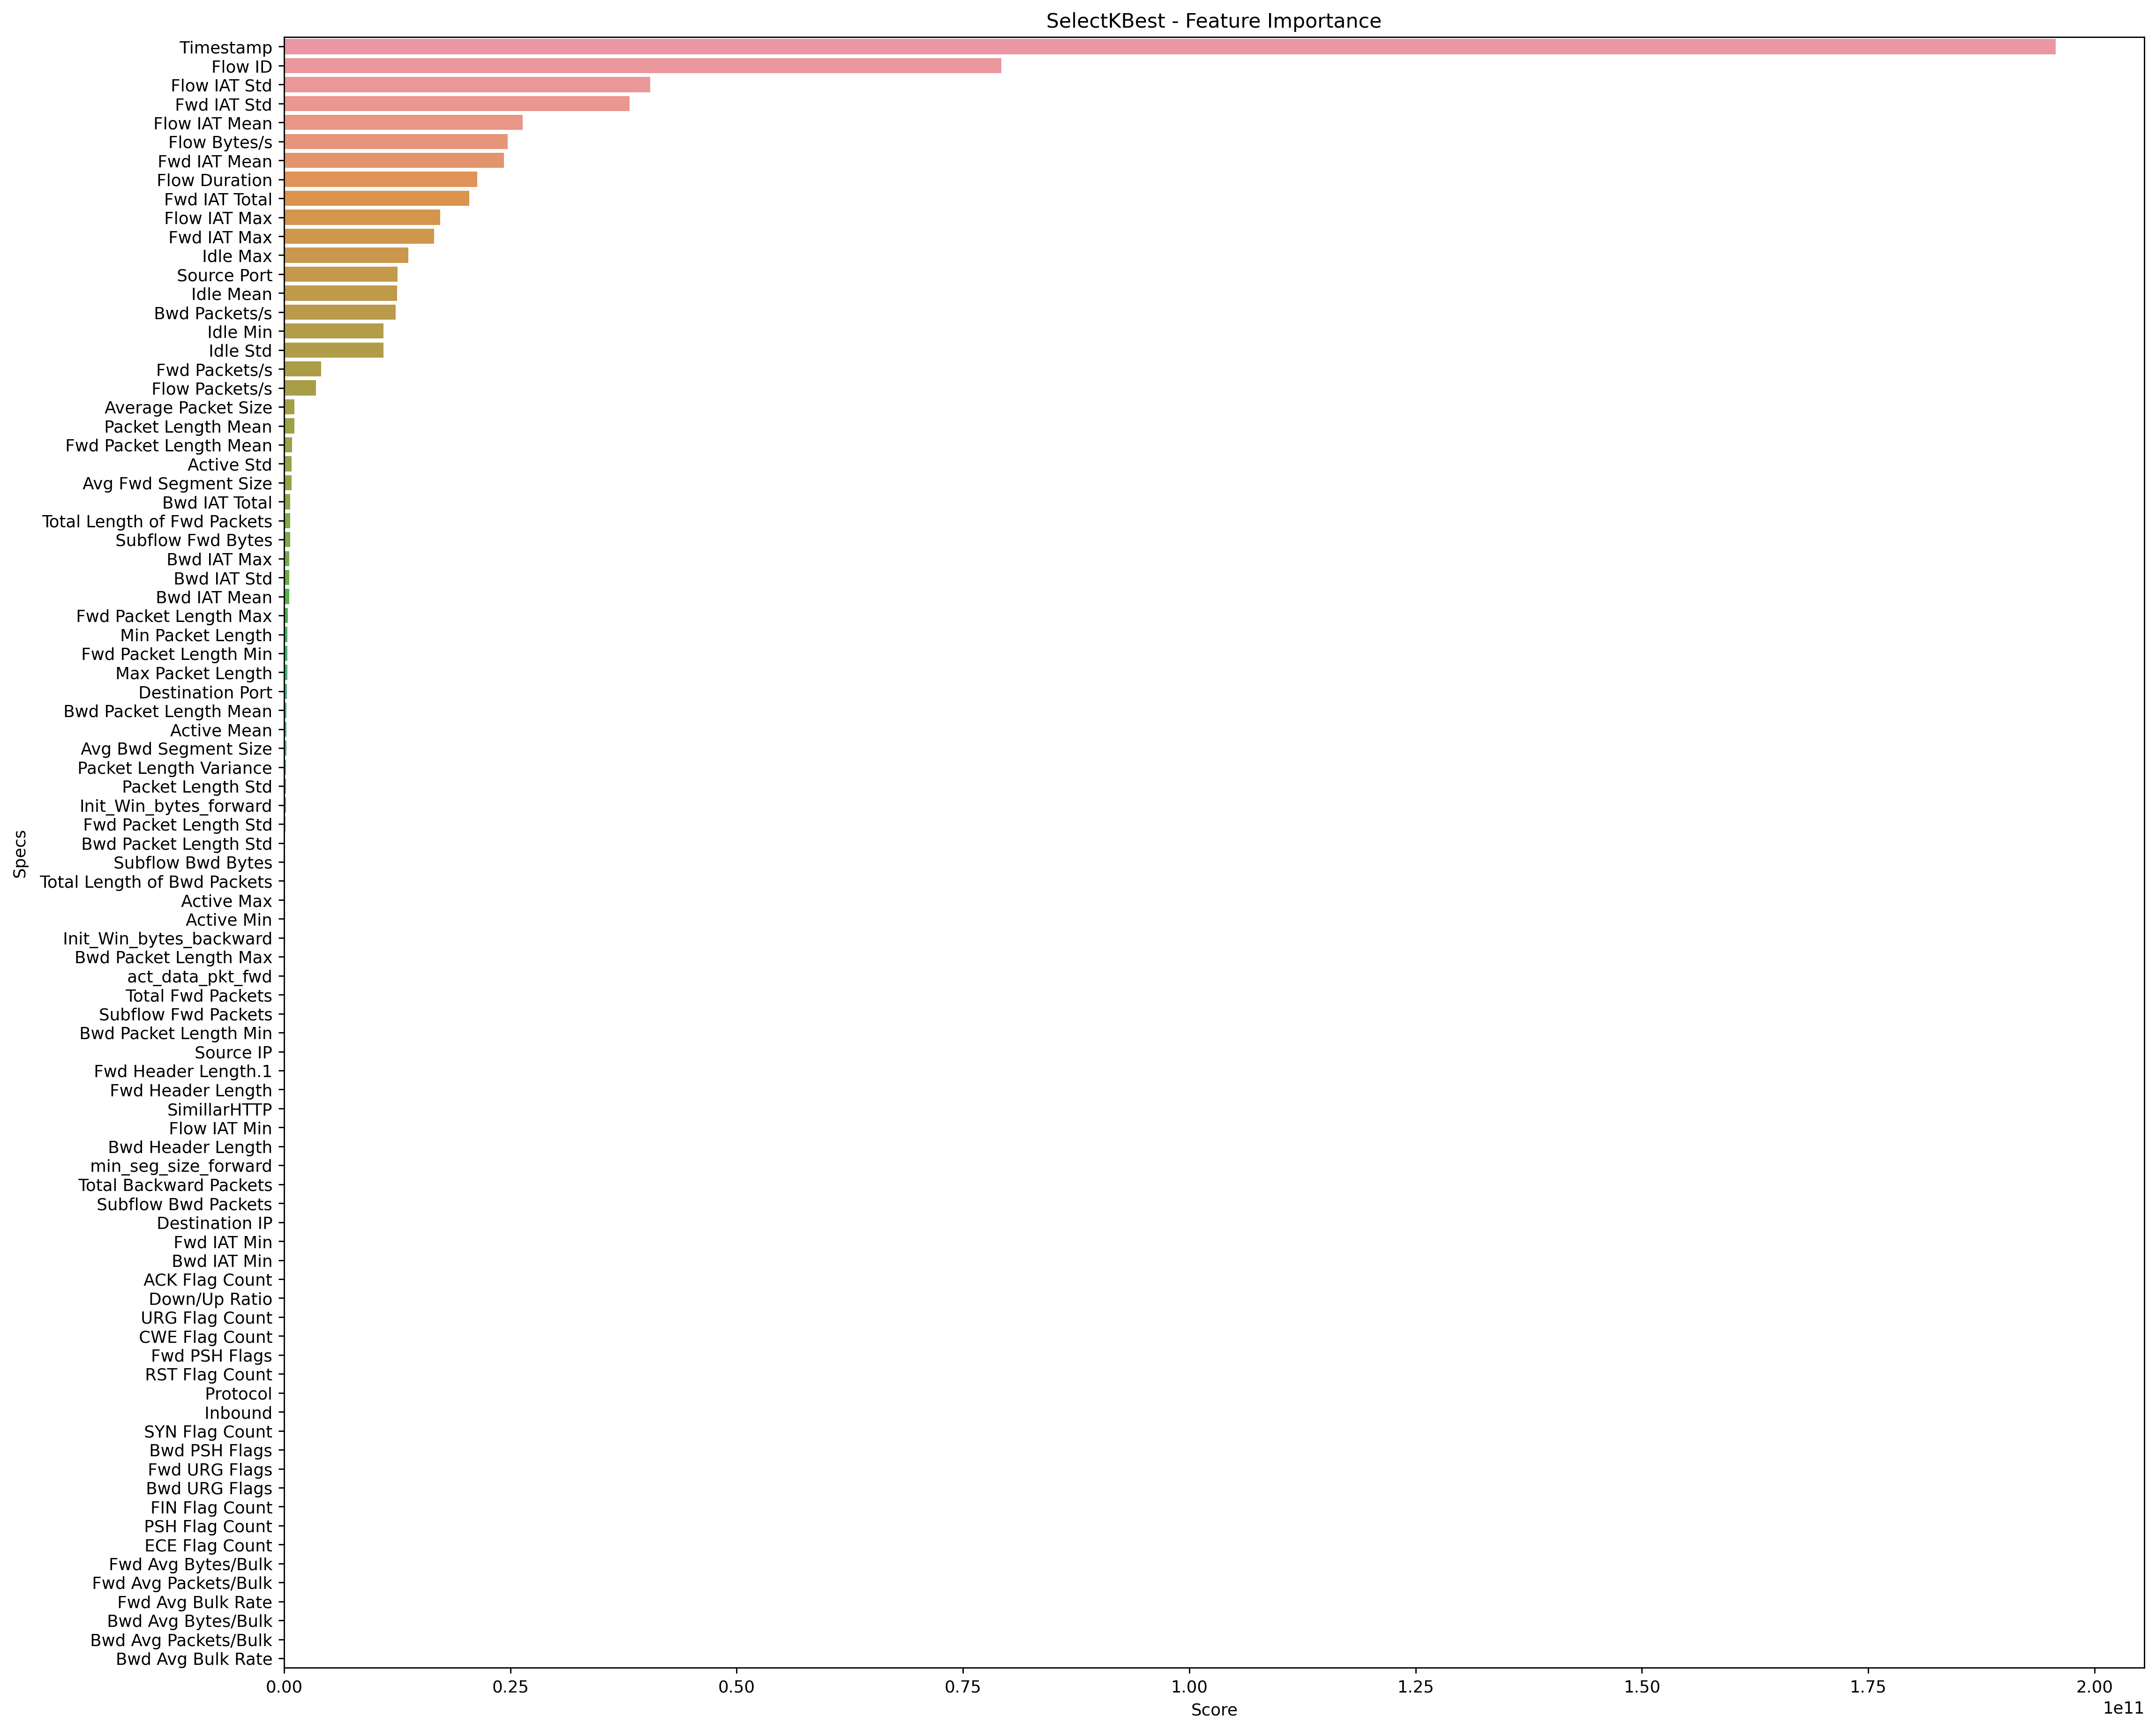

In [31]:
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import seaborn as sns
figure(num=None, figsize=(20,18), dpi=256, facecolor='w', edgecolor='r')
plt.title("SelectKBest - Feature Importance")
# sns.barplot(fit.scores_, x.columns)
# make barplot and sort bars
sns.barplot(x='Score', y= 'Specs',data=featureScores,
			order=featureScores.sort_values('Score',ascending = False).Specs)
plt.show()

In [32]:
tmp1 = featureScores.sort_values('Score',ascending = False).Specs[0:20]

In [33]:
dfout = pd.DataFrame()
for i in tmp1:
  dfout[i] = data1[i]
dfout['Label'] = data1[' Label']


In [34]:
dfout

,Timestamp,Flow ID,Flow IAT Std,Fwd IAT Std,Flow IAT Mean,Flow Bytes/s,Fwd IAT Mean,Flow Duration,Fwd IAT Total,Flow IAT Max,...,Idle Max,Source Port,Idle Mean,Bwd Packets/s,Idle Min,Idle Std,Fwd Packets/s,Flow Packets/s,Average Packet Size,Label
0,2018-12-01 10:51:39.813448,172.16.0.5-192.168.50.1-634-60495-17,5.009593e+02,5.009593e+02,2.959896e+02,1.502024e+06,2.959896e+02,28415,28415.0,3596.0,...,0.0,634,0.0,0.000000,0.0,0.000000e+00,3413.689952,3413.689952,444.536082,DrDoS_DNS
1,2018-12-01 10:51:39.820842,172.16.0.5-192.168.50.1-60495-634-17,0.000000e+00,0.000000e+00,2.000000e+00,4.400000e+08,2.000000e+00,2,2.0,2.0,...,0.0,634,0.0,0.000000,0.0,0.000000e+00,1000000.000000,1000000.000000,660.000000,DrDoS_DNS
2,2018-12-01 10:51:39.852499,172.16.0.5-192.168.50.1-634-46391-17,5.781014e+02,5.781014e+02,2.439648e+02,1.812602e+06,2.439648e+02,48549,48549.0,5418.0,...,0.0,634,0.0,0.000000,0.0,0.000000e+00,4119.549321,4119.549321,442.200000,DrDoS_DNS
3,2018-12-01 10:51:39.890213,172.16.0.5-192.168.50.1-634-11894-17,4.852927e+02,4.852927e+02,2.428995e+02,1.820552e+06,2.428995e+02,48337,48337.0,3337.0,...,0.0,634,0.0,0.000000,0.0,0.000000e+00,4137.617146,4137.617146,442.200000,DrDoS_DNS
4,2018-12-01 10:51:39.941151,172.16.0.5-192.168.50.1-634-27878-17,1.968913e+02,1.968913e+02,1.609347e+02,2.747767e+06,1.609347e+02,32026,32026.0,1236.0,...,0.0,634,0.0,0.000000,0.0,0.000000e+00,6244.925998,6244.925998,442.200000,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,2018-12-01 13:29:48.327410,172.16.0.5-192.168.50.1-5838-5838-6,1.587334e+07,1.587334e+07,9.164479e+06,0.000000e+00,9.164479e+06,27493436,27493436.0,27493434.0,...,27493434.0,5838,27493434.0,0.000000,27493434.0,0.000000e+00,0.145489,0.145489,0.000000,UDP-lag
1099996,2018-12-01 13:29:48.327411,172.16.0.5-192.168.50.1-30092-1933-6,0.000000e+00,0.000000e+00,4.900000e+01,0.000000e+00,4.900000e+01,49,49.0,49.0,...,0.0,30092,0.0,0.000000,0.0,0.000000e+00,40816.326531,40816.326531,0.000000,UDP-lag
1099997,2018-12-01 13:29:48.327460,172.16.0.5-192.168.50.1-42092-42092-6,6.785286e+06,7.662714e+06,3.843994e+06,0.000000e+00,5.381592e+06,26907958,26907958.0,16425353.0,...,16425353.0,42092,13453918.5,0.074327,10482484.0,4.202243e+06,0.222982,0.297310,0.000000,UDP-lag
1099998,2018-12-01 13:29:48.327519,172.16.0.5-192.168.50.1-30093-25747-6,3.175426e+01,0.000000e+00,1.933333e+01,0.000000e+00,1.000000e+00,58,1.0,56.0,...,0.0,30093,0.0,34482.758621,0.0,0.000000e+00,34482.758621,68965.517241,0.000000,UDP-lag


In [37]:
dfout.to_csv('/content/drive/MyDrive/dataset/bestK1.csv', index=False)

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model1 = ExtraTreesClassifier()
model1.fit(x,y)

ExtraTreesClassifier()

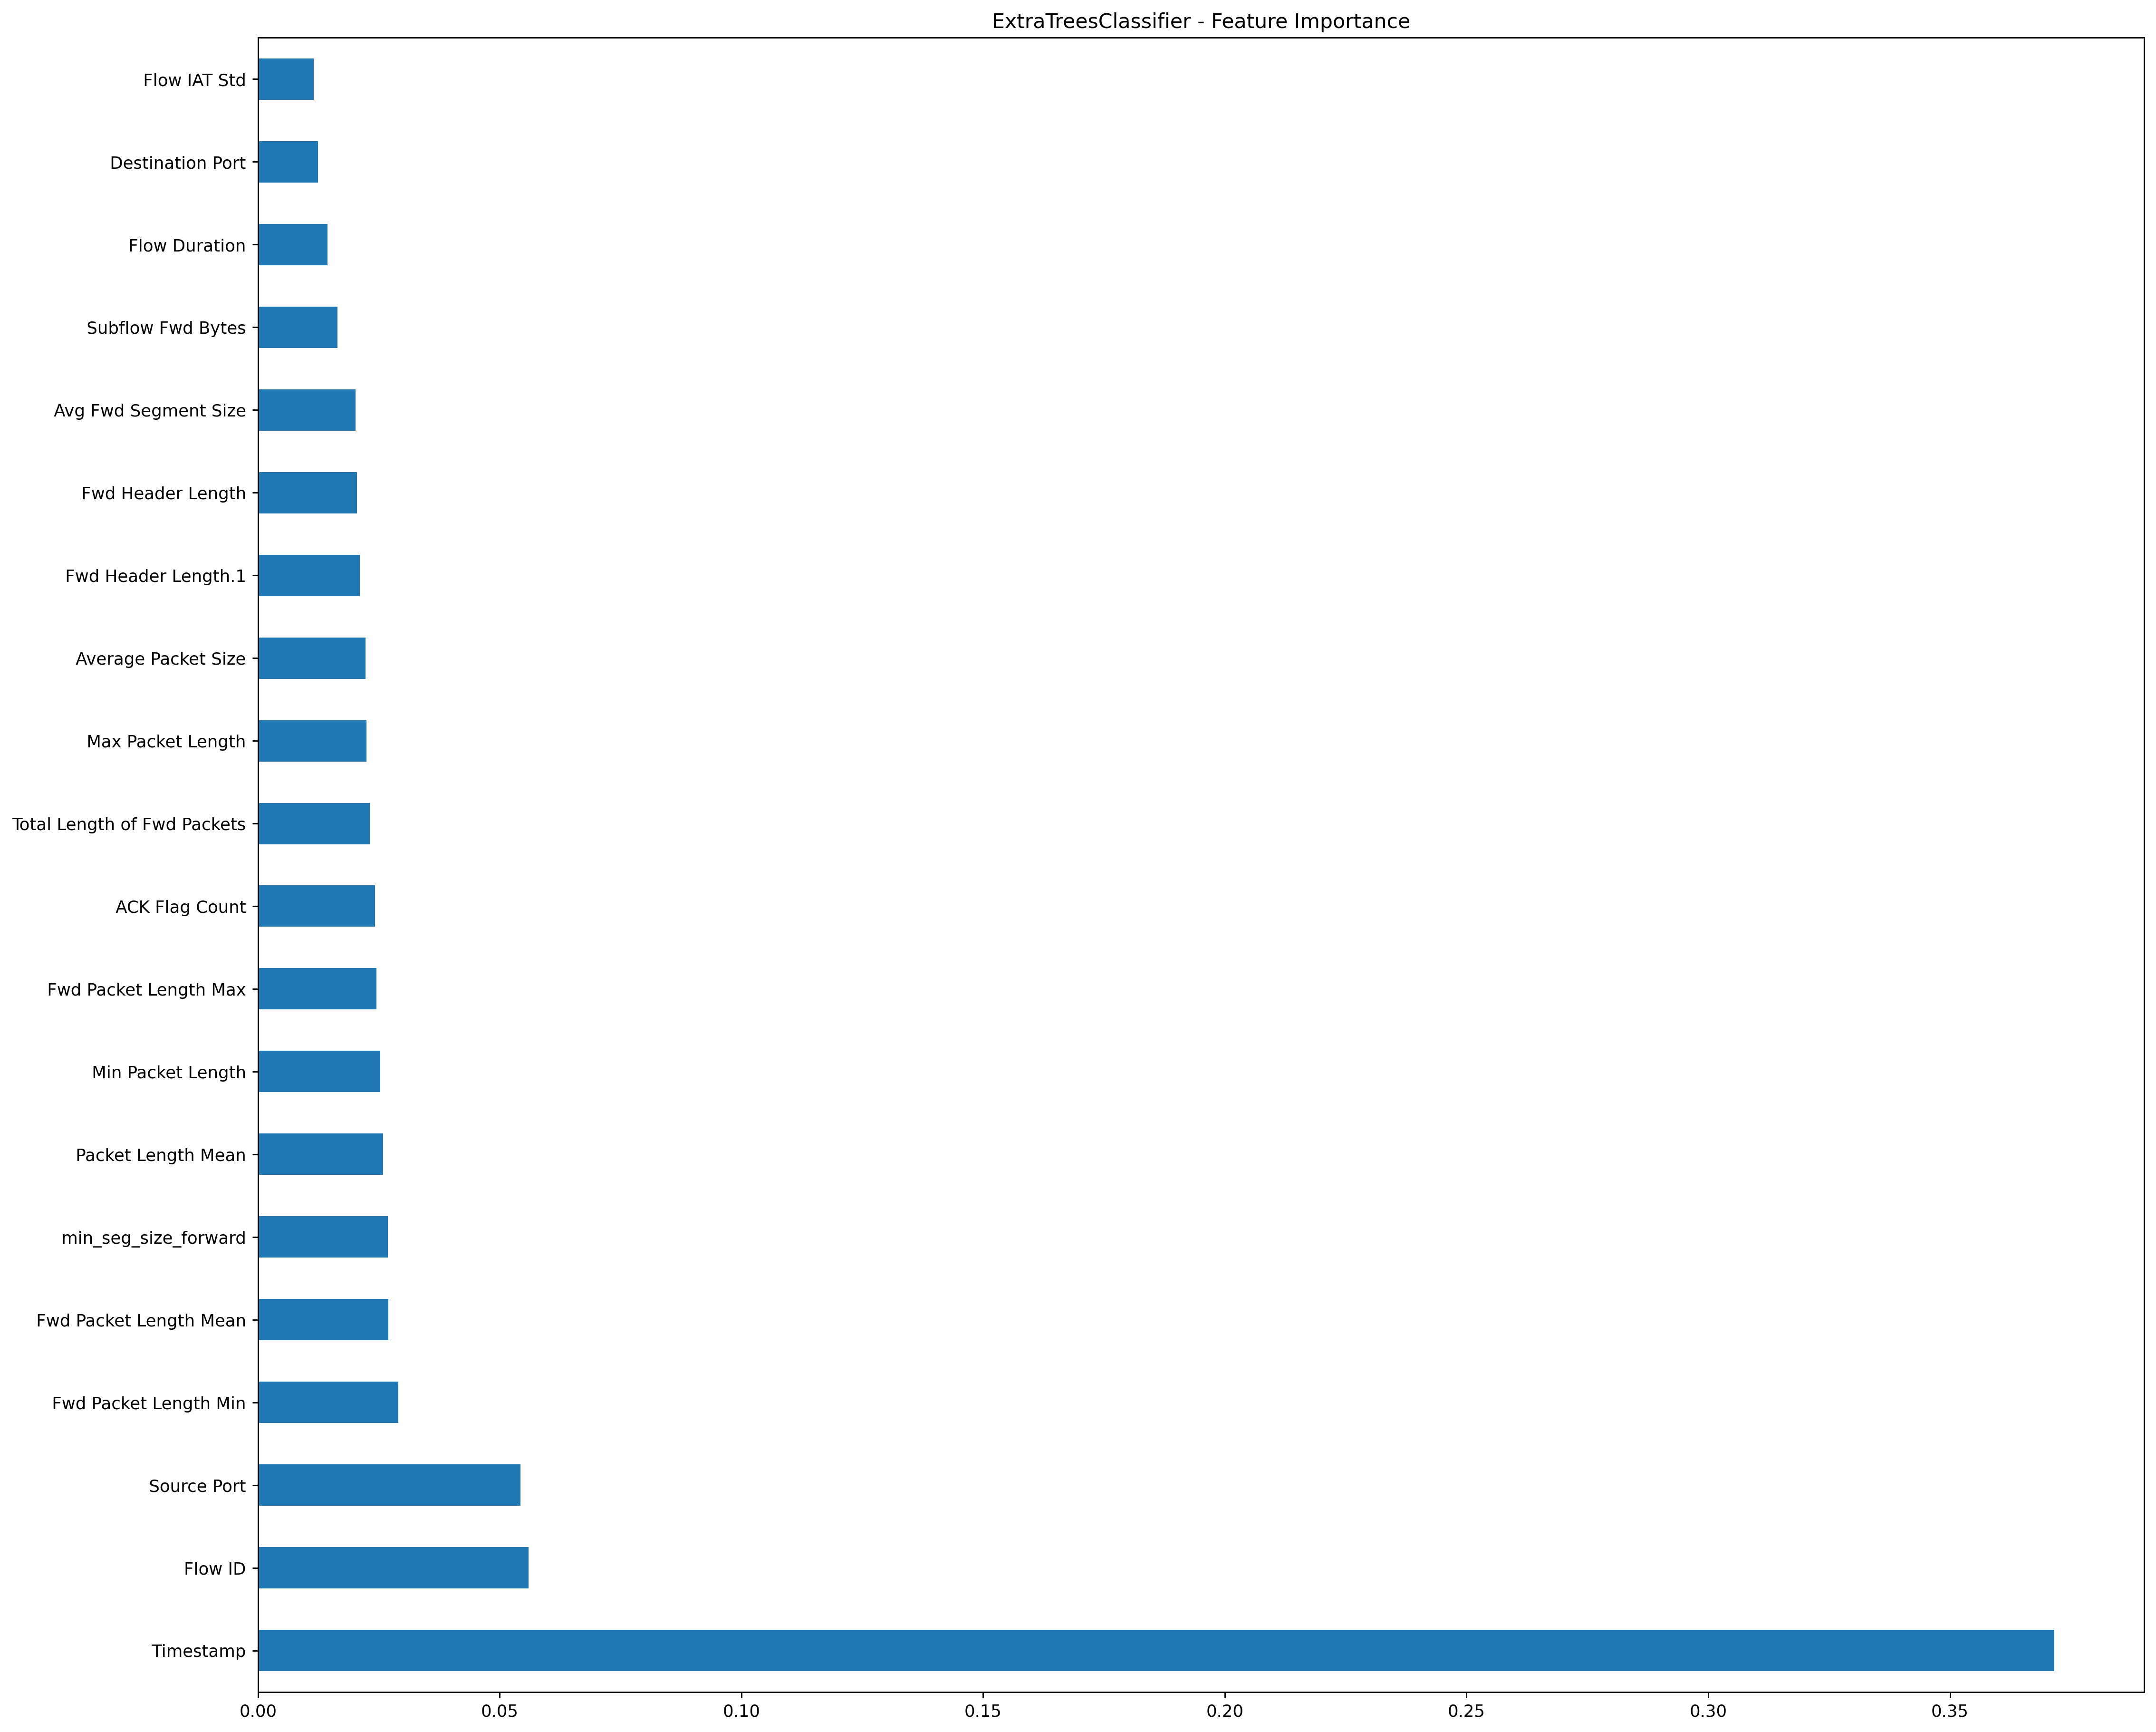

In [39]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(model1.feature_importances_, index=x.columns)
figure(num=None, figsize=(20,18), dpi=256, facecolor='w', edgecolor='r')
feat_importances.nlargest(20).plot(kind='barh')
plt.title("ExtraTreesClassifier - Feature Importance")
plt.show()

In [41]:
tmp2 = feat_importances.nlargest(20).keys()

In [42]:
dfout1 = pd.DataFrame()
for i in tmp2:
  dfout1[i] = data1[i]
dfout1['Label'] = data1[' Label']


In [43]:
dfout1

,Timestamp,Flow ID,Source Port,Fwd Packet Length Min,Fwd Packet Length Mean,min_seg_size_forward,Packet Length Mean,Min Packet Length,Fwd Packet Length Max,ACK Flag Count,...,Max Packet Length,Average Packet Size,Fwd Header Length.1,Fwd Header Length,Avg Fwd Segment Size,Subflow Fwd Bytes,Flow Duration,Destination Port,Flow IAT Std,Label
0,2018-12-01 10:51:39.813448,172.16.0.5-192.168.50.1-634-60495-17,634,440.0,440.0,-1,440.0,440.0,440.0,0,...,440.0,444.536082,-97,-97,440.0,42680,28415,60495,5.009593e+02,DrDoS_DNS
1,2018-12-01 10:51:39.820842,172.16.0.5-192.168.50.1-60495-634-17,634,440.0,440.0,-1,440.0,440.0,440.0,0,...,440.0,660.000000,-2,-2,440.0,880,2,60495,0.000000e+00,DrDoS_DNS
2,2018-12-01 10:51:39.852499,172.16.0.5-192.168.50.1-634-46391-17,634,440.0,440.0,-1,440.0,440.0,440.0,0,...,440.0,442.200000,-200,-200,440.0,88000,48549,46391,5.781014e+02,DrDoS_DNS
3,2018-12-01 10:51:39.890213,172.16.0.5-192.168.50.1-634-11894-17,634,440.0,440.0,-1,440.0,440.0,440.0,0,...,440.0,442.200000,-200,-200,440.0,88000,48337,11894,4.852927e+02,DrDoS_DNS
4,2018-12-01 10:51:39.941151,172.16.0.5-192.168.50.1-634-27878-17,634,440.0,440.0,-1,440.0,440.0,440.0,0,...,440.0,442.200000,-200,-200,440.0,88000,32026,27878,1.968913e+02,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099995,2018-12-01 13:29:48.327410,172.16.0.5-192.168.50.1-5838-5838-6,5838,0.0,0.0,20,0.0,0.0,0.0,1,...,0.0,0.000000,80,80,0.0,0,27493436,5838,1.587334e+07,UDP-lag
1099996,2018-12-01 13:29:48.327411,172.16.0.5-192.168.50.1-30092-1933-6,30092,0.0,0.0,20,0.0,0.0,0.0,1,...,0.0,0.000000,40,40,0.0,0,49,1933,0.000000e+00,UDP-lag
1099997,2018-12-01 13:29:48.327460,172.16.0.5-192.168.50.1-42092-42092-6,42092,0.0,0.0,20,0.0,0.0,0.0,1,...,0.0,0.000000,120,120,0.0,0,26907958,42092,6.785286e+06,UDP-lag
1099998,2018-12-01 13:29:48.327519,172.16.0.5-192.168.50.1-30093-25747-6,30093,0.0,0.0,20,0.0,0.0,0.0,1,...,0.0,0.000000,40,40,0.0,0,58,25747,3.175426e+01,UDP-lag


In [44]:
dfout1.to_csv('/content/drive/MyDrive/dataset/extraTreeLarge.csv', index=False)